# Cvičení o světových požárech: Příprava podkladů (jen v AJ)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Resources

In [2]:
# San-Miguel-Ayanz, J., Durrant, T., Boca, R., Maianti, P., Liberta`, G., Artes Vivancos, T., Jacome Felix Oom, D., Branco, A., De Rigo, D., Ferrari, D., Pfeiffer, H., Grecchi, R., Nuijten, D. and Leray, T., Forest Fires in Europe, Middle East and North Africa 2019
# https://www.eea.europa.eu/data-and-maps/daviz/burnt-forest-area-in-five-3#tab-chart_5
# burnt-forest-area-in-five-3 (EU data)

In [3]:
# global.csv is dataset from 'globalforestwatch.org'

In [4]:
# fire_in_cds.pdf is a readme for the copernicus project.

In [5]:
# https://storage.googleapis.com/earthenginepartners-hansen/GFC-2020-v1.8/download.html
# download tiffs (they are huge)

In [6]:
# Environment_Temperature_change_E_All_Data_(Normalized)
# data from http://www.fao.org/faostat/en/#data/ET
# data for 1961-2020

# temperature change with respect to a baseline climatology, corresponding to the period 1951–1980. 
# The standard deviation of the temperature change of the baseline methodology is also available.
# Data are based on the publicly available GISTEMP data, the Global Surface Temperature Change data
# distributed by the National Aeronautics and Space Administration Goddard Institute for Space Studies (NASA-GISS)

In [7]:
# GlobalLandTemperaturesByCountry.csv
# download from kaggle

In [8]:
# http://data.un.org/Data.aspx?d=CLINO&f=ElementCode%3A06
# precipitation data.

# Forest area and burned area from MODIS observations

In [4]:
# burned area from MODIS observations
# years 2012-2021
burned_area = pd.read_csv('../../resource/GFW_Global_regions_with_the_most_burned_area/modis_burned_area__ha.csv')

In [5]:
burned_area.tail()

,iso,alert__year,alert__week,burned_area__ha
3941,ZWE,2020,14,13.018353
3942,ZWE,2021,10,155.781550
3943,ZWE,2021,11,233.875193
3944,ZWE,2021,12,818.311675
3945,ZWE,2021,13,325.567926


In [6]:
# tree cover from the same source, just a single number per country.
# Probably use for simplicity
forest_area = pd.read_csv('../../resource/GFW_Global_regions_with_the_most_burned_area/treecover_extent_in__by_region__ha.csv')

In [7]:
forest_area.head()

,iso,area__ha
0,RUS,1.342744e+10
1,USA,7.576667e+09
2,CHN,7.505788e+09
3,CAN,7.211281e+09
4,BRA,6.800285e+09


In [13]:
# temperature data
# # Environment_Temperature_change_E_All_Data_(Normalized)
# data from http://www.fao.org/faostat/en/#data/ET
# data for 1961-2020
# monitor t- change from a baseline.

# temperature change with respect to a baseline climatology, corresponding to the period 1951–1980. 
# The standard deviation of the temperature change of the baseline methodology is also available.
# Data are based on the publicly available GISTEMP data, the Global Surface Temperature Change data
# distributed by the National Aeronautics and Space Administration Goddard Institute for Space Studies (NASA-GISS)

In [8]:
t_change = pd.read_csv('../../resource/t_change/Environment_Temperature_change_E_All_Data.csv')

In [9]:
t_change.head()

,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Y1961,Y1961F,Y1962,...,Y2016,Y2016F,Y2017,Y2017F,Y2018,Y2018F,Y2019,Y2019F,Y2020,Y2020F
0,2,Afghanistan,7001,January,7271,Temperature change,�C,0.746,Fc,0.009,...,3.561,Fc,1.386,Fc,2.120,Fc,3.187,Fc,-0.472,Fc
1,2,Afghanistan,7001,January,6078,Standard Deviation,�C,1.947,Fc,1.947,...,1.947,Fc,1.947,Fc,1.947,Fc,1.947,Fc,1.947,Fc
2,2,Afghanistan,7002,February,7271,Temperature change,�C,-1.792,Fc,2.397,...,2.390,Fc,-0.077,Fc,2.820,Fc,0.334,Fc,2.668,Fc
3,2,Afghanistan,7002,February,6078,Standard Deviation,�C,2.590,Fc,2.590,...,2.590,Fc,2.590,Fc,2.590,Fc,2.590,Fc,2.590,Fc
4,2,Afghanistan,7003,March,7271,Temperature change,�C,0.458,Fc,1.281,...,2.490,Fc,0.975,Fc,4.536,Fc,0.471,Fc,0.731,Fc


In [10]:
## iso values
iso = burned_area.iso.unique()

In [11]:
type(iso)

numpy.ndarray

In [12]:
# sum burned area over weeks  and years to get yearly data
burned_total = burned_area.groupby('iso').sum()

In [13]:
burned_total.drop(columns=['alert__year', 'alert__week'], inplace=True)

In [14]:
burned_total.head()

,burned_area__ha
iso,
AFG,3.737909e+03
AGO,8.027034e+05
ALB,5.537902e+02
ARE,3.873991e+02
ARG,1.283496e+06


In [15]:
## 
burned_total['forest_area'] = 0

In [16]:
for i in iso:
    burned_total.loc[i, 'forest_area'] = float(forest_area[forest_area['iso']==i].area__ha)

In [17]:
burned_total.head()

,burned_area__ha,forest_area
iso,,
AFG,3.737909e+03,5.150857e+08
AGO,8.027034e+05,9.979384e+08
ALB,5.537902e+02,2.298830e+07
ARE,3.873991e+02,5.696358e+07
ARG,1.283496e+06,2.224081e+09


In [18]:
## adding temperature data.
t_change.head()

,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Y1961,Y1961F,Y1962,...,Y2016,Y2016F,Y2017,Y2017F,Y2018,Y2018F,Y2019,Y2019F,Y2020,Y2020F
0,2,Afghanistan,7001,January,7271,Temperature change,�C,0.746,Fc,0.009,...,3.561,Fc,1.386,Fc,2.120,Fc,3.187,Fc,-0.472,Fc
1,2,Afghanistan,7001,January,6078,Standard Deviation,�C,1.947,Fc,1.947,...,1.947,Fc,1.947,Fc,1.947,Fc,1.947,Fc,1.947,Fc
2,2,Afghanistan,7002,February,7271,Temperature change,�C,-1.792,Fc,2.397,...,2.390,Fc,-0.077,Fc,2.820,Fc,0.334,Fc,2.668,Fc
3,2,Afghanistan,7002,February,6078,Standard Deviation,�C,2.590,Fc,2.590,...,2.590,Fc,2.590,Fc,2.590,Fc,2.590,Fc,2.590,Fc
4,2,Afghanistan,7003,March,7271,Temperature change,�C,0.458,Fc,1.281,...,2.490,Fc,0.975,Fc,4.536,Fc,0.471,Fc,0.731,Fc


In [19]:
## embedd country codes
import datapackage

In [20]:
data_url = 'https://datahub.io/core/country-codes/datapackage.json'
package = datapackage.Package(data_url)

In [21]:
resources = package.resources

In [22]:
for resource in resources:
    if resource.tabular:
        data = pd.read_csv(resource.descriptor['path'])

In [23]:
data.head()

,FIFA,Dial,ISO3166-1-Alpha-3,MARC,is_independent,ISO3166-1-numeric,GAUL,FIPS,WMO,ISO3166-1-Alpha-2,...,Sub-region Name,official_name_ru,Global Name,Capital,Continent,TLD,Languages,Geoname ID,CLDR display name,EDGAR
0,TPE,886,TWN,ch,Yes,158.0,925,TW,,TW,...,NaN,NaN,NaN,Taipei,AS,.tw,"zh-TW,zh,nan,hak",1668284.0,Taiwan,NaN
1,AFG,93,AFG,af,Yes,4.0,1,AF,AF,AF,...,Southern Asia,Афганистан,World,Kabul,AS,.af,"fa-AF,ps,uz-AF,tk",1149361.0,Afghanistan,B2
2,ALB,355,ALB,aa,Yes,8.0,3,AL,AB,AL,...,Southern Europe,Албания,World,Tirana,EU,.al,"sq,el",783754.0,Albania,B3
3,ALG,213,DZA,ae,Yes,12.0,4,AG,AL,DZ,...,Northern Africa,Алжир,World,Algiers,AF,.dz,ar-DZ,2589581.0,Algeria,B4
4,ASA,1-684,ASM,as,Territory of US,16.0,5,AQ,,AS,...,Polynesia,Американское Самоа,World,Pago Pago,OC,.as,"en-AS,sm,to",5880801.0,American Samoa,B5


In [24]:
data[['ISO3166-1-Alpha-3', 'UNTERM English Short']]

,ISO3166-1-Alpha-3,UNTERM English Short
0,TWN,NaN
1,AFG,Afghanistan
2,ALB,Albania
3,DZA,Algeria
4,ASM,NaN
...,...,...
245,ESH,NaN
246,YEM,Yemen
247,ZMB,Zambia
248,ZWE,Zimbabwe


In [25]:
data.columns

Index(['FIFA', 'Dial', 'ISO3166-1-Alpha-3', 'MARC', 'is_independent',
       'ISO3166-1-numeric', 'GAUL', 'FIPS', 'WMO', 'ISO3166-1-Alpha-2', 'ITU',
       'IOC', 'DS', 'UNTERM Spanish Formal', 'Global Code',
       'Intermediate Region Code', 'official_name_fr', 'UNTERM French Short',
       'ISO4217-currency_name', 'Developed / Developing Countries',
       'UNTERM Russian Formal', 'UNTERM English Short',
       'ISO4217-currency_alphabetic_code',
       'Small Island Developing States (SIDS)', 'UNTERM Spanish Short',
       'ISO4217-currency_numeric_code', 'UNTERM Chinese Formal',
       'UNTERM French Formal', 'UNTERM Russian Short', 'M49',
       'Sub-region Code', 'Region Code', 'official_name_ar',
       'ISO4217-currency_minor_unit', 'UNTERM Arabic Formal',
       'UNTERM Chinese Short', 'Land Locked Developing Countries (LLDC)',
       'Intermediate Region Name', 'official_name_es', 'UNTERM English Formal',
       'official_name_cn', 'official_name_en', 'ISO4217-currency_count

In [35]:
data['Region Name'].value_counts()

Africa      60
Americas    57
Europe      52
Asia        50
Oceania     29
Name: Region Name, dtype: int64

In [36]:
data['Sub-region Name'].value_counts()

Sub-Saharan Africa                 53
Latin America and the Caribbean    52
Western Asia                       18
Northern Europe                    17
Southern Europe                    16
South-eastern Asia                 11
Eastern Europe                     10
Polynesia                          10
Southern Asia                       9
Western Europe                      9
Micronesia                          8
Northern Africa                     7
Eastern Asia                        7
Australia and New Zealand           6
Central Asia                        5
Melanesia                           5
Northern America                    5
Name: Sub-region Name, dtype: int64

In [56]:
dt = t_change.groupby(by=['Area', 'Element']).mean()

In [57]:
dt.head()

Area Code  Months Code  Element Code  \
Area        Element                                                    
Afghanistan Standard Deviation        2.0  7009.882353        6078.0   
            Temperature change        2.0  7009.882353        7271.0   
Africa      Standard Deviation     5100.0  7009.882353        6078.0   
            Temperature change     5100.0  7009.882353        7271.0   
Albania     Standard Deviation        3.0  7009.882353        6078.0   

                                   Y1961     Y1962     Y1963     Y1964  \
Area        Element                                                      
Afghanistan Standard Deviation  1.189059  1.189059  1.189059  1.189059   
            Temperature change -0.017471 -0.248824  0.848176 -0.958882   
Africa      Standard Deviation  0.340000  0.340000  0.340000  0.340000   
            Temperature change -0.105059 -0.017529  0.079059 -0.199588   
Albania     Standard Deviation  1.094588  1.094588  1.094588  1.094588   

                                   Y1965     Y1966     Y1967  ...     Y2011  \
Area        Element                                           ...             
Afghanistan Standard Deviation  1.189059  1.189059  1.189059  ...  1.189059   
            Temperature change -0.102294  0.216882 -0.374294  ...  1.368647   
Africa      Standard Deviation  0.340000  0.340000  0.340000  ...  0.340000   
            Temperature change -0.203000  0.148941 -0.216882  ...  0.903882   
Albania     Standard Deviation  1.094588  1.094588  1.094588  ...  1.094588   

                                   Y2012     Y2013     Y2014     Y2015  \
Area        Element                                                      
Afghanistan Standard Deviation  1.189059  1.189059  1.189059  1.189059   
            Temperature change  0.361294  1.338941  0.541471  1.176647   
Africa      Standard Deviation  0.340000  0.340000  0.340000  0.340000   
            Temperature change  0.840118  1.018000  1.054294  1.212824   
Albania     Standard Deviation  1.094588  1.094588  1.094588  1.094588   

                                   Y2016     Y2017     Y2018     Y2019  \
Area        Element                                                      
Afghanistan Standard Deviation  1.189059  1.189059  1.189059  1.189059   
            Temperature change  1.783000  1.445882  1.740176  1.132824   
Africa      Standard Deviation  0.340000  0.340000  0.340000  0.340000   
            Temperature change  1.467706  1.186353  1.207059  1.361824   
Albania     Standard Deviation  1.094588  1.094588  1.094588  1.094588   

                                   Y2020  
Area        Element                       
Afghanistan Standard Deviation  1.189059  
            Temperature change  0.449294  
Africa      Standard Deviation  0.340000  
            Temperature change  1.268706  
Albania     Standard Deviation  1.094588  

[5 rows x 63 columns]

In [58]:
dt = dt.drop(columns=['Area Code', 'Months Code', 'Element Code'])

In [59]:
dt = dt[['Y2012', 'Y2013', 'Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018', 'Y2019', 'Y2020']]

In [60]:
dt.head()

Y2012     Y2013     Y2014     Y2015  \
Area        Element                                                      
Afghanistan Standard Deviation  1.189059  1.189059  1.189059  1.189059   
            Temperature change  0.361294  1.338941  0.541471  1.176647   
Africa      Standard Deviation  0.340000  0.340000  0.340000  0.340000   
            Temperature change  0.840118  1.018000  1.054294  1.212824   
Albania     Standard Deviation  1.094588  1.094588  1.094588  1.094588   

                                   Y2016     Y2017     Y2018     Y2019  \
Area        Element                                                      
Afghanistan Standard Deviation  1.189059  1.189059  1.189059  1.189059   
            Temperature change  1.783000  1.445882  1.740176  1.132824   
Africa      Standard Deviation  0.340000  0.340000  0.340000  0.340000   
            Temperature change  1.467706  1.186353  1.207059  1.361824   
Albania     Standard Deviation  1.094588  1.094588  1.094588  1.094588   

                                   Y2020  
Area        Element                       
Afghanistan Standard Deviation  1.189059  
            Temperature change  0.449294  
Africa      Standard Deviation  0.340000  
            Temperature change  1.268706  
Albania     Standard Deviation  1.094588

In [61]:
dt = dt.reset_index()

In [62]:
dt = dt.set_index('Area')

In [63]:
dt = dt[dt['Element']== 'Temperature change'].mean(axis=1)

In [64]:
iso_dict = dict(zip(data['ISO3166-1-Alpha-3'], data['UNTERM English Short']))

In [65]:
df = burned_total.copy()

In [66]:
for i in iso:
#     burned_total.loc[i, 'forest_area'] = float(forest_area[forest_area['iso']==i].area__ha)
    try:
        df.loc[i, 't_change'] = float(dt[dt.index==iso_dict[i]])
    except:
        pass

In [67]:
dt

Area
Afghanistan       1.107725
Africa            1.179654
Albania           1.646248
Algeria           1.440961
American Samoa    1.010340
                    ...   
World             1.354379
Yemen                  NaN
Yugoslav SFR           NaN
Zambia            1.136092
Zimbabwe          0.850327
Length: 285, dtype: float64

In [68]:
df

,burned_area__ha,forest_area,t_change
iso,,,
AFG,3.737909e+03,5.150857e+08,1.107725
AGO,8.027034e+05,9.979384e+08,1.151922
ALB,5.537902e+02,2.298830e+07,1.646248
ARE,3.873991e+02,5.696358e+07,NaN
ARG,1.283496e+06,2.224081e+09,0.754660
...,...,...,...
XCA,5.646024e+04,2.972651e+08,NaN
XKO,2.510356e+03,8.735812e+06,NaN
ZAF,6.255024e+05,9.757682e+08,1.153850


In [69]:
df = df.dropna()

In [71]:
## this is the final DF for the exercise.
df

,burned_area__ha,forest_area,t_change
iso,,,
AFG,3.737909e+03,5.150857e+08,1.107725
AGO,8.027034e+05,9.979384e+08,1.151922
ALB,5.537902e+02,2.298830e+07,1.646248
ARG,1.283496e+06,2.224081e+09,0.754660
ARM,1.776873e+03,2.375207e+07,1.606222
...,...,...,...
VEN,6.937439e+06,7.299938e+08,0.827268
VNM,2.785125e+06,2.634208e+08,1.098438
ZAF,6.255024e+05,9.757682e+08,1.153850


----
---

# Testing part

In [83]:
## database of all open data institutes

In [84]:
df = pd.read_csv('https://query.data.world/s/a62a7rkgogdlr5vooqc7qf7psxkekv',sep=';')

In [85]:
df.head()

,Name,Organisation,Country,Pays,URL,Description,Location,Latitude,Longitude,has_issue,issue_type,code_en,code_fr,country_slug
0,Secretaríade Obras Públicasdela Nación Argentina,Secretaríade Obras Públicasdela Nación Argentina,Argentina,Argentine,http://data.gsop.opendata.arcgis.com,Arcgis OpenData Portal,"-40.4627603752, -63.6070193058",-40.46276038,-63.60701931,True,dummy,Argentina - Secretaríade Obras Públicasdela Na...,Argentine - Secretaríade Obras Públicasdela Na...,argentina
1,Open Data Portal Austria,"Wikimedia Austria, ok.at, Cooperation OGD Austria",Austria,Autriche,http://opendataportal.at,"labour&employment, population, education&scien...","48.2018644, 16.3533064",48.2018644,16.3533064,False,NaN,Austria - Open Data Portal Austria,Autriche - Open Data Portal Austria,austria
2,INSTITUTO GEOGRÁFICO NACIONAL,INSTITUTO GEOGRÁFICO NACIONAL,Argentina,Argentine,http://data.ignarg.opendata.arcgis.com,Arcgis OpenData Portal,"-40.4627603752, -63.6070193058",-40.46276038,-63.60701931,False,NaN,Argentina - INSTITUTO GEOGRÁFICO NACIONAL,Argentine - INSTITUTO GEOGRÁFICO NACIONAL,argentina
3,Sunshine Coast Council Open Data,Sunshine Coast Council,Australia,Australie,https://data.sunshinecoast.qld.gov.au,Sunshine Coast Council open data,"-26.65481, 153.093152",-26.65481,153.093152,NaN,NaN,Australia - Sunshine Coast Council Open Data,Australie - Sunshine Coast Council Open Data,australia
4,INSPIRE Austria,INSPIRE Coordination body,Austria,Autriche,http://inspire.gv.at/,Geo Information,"48.2099296, 16.3807722",48.2099296,16.3807722,False,NaN,Austria - INSPIRE Austria,Autriche - INSPIRE Austria,austria


In [87]:
df[df.Country=='Portugal']

,Name,Organisation,Country,Pays,URL,Description,Location,Latitude,Longitude,has_issue,issue_type,code_en,code_fr,country_slug
1149,Associaçãode Beneficiáriosdo Roxo,Associaçãode Beneficiáriosdo Roxo,Portugal,Portugal,http://qarsc.abroxo.opendata.arcgis.com,Arcgis OpenData Portal,"38.9173862208, -8.34901545055",38.91738622,-8.349015451,NaN,NaN,Portugal - Associaçãode Beneficiáriosdo Roxo,Portugal - Associaçãode Beneficiáriosdo Roxo,portugal
1164,National Statistical Institute,Portugal,Portugal,Portugal,http://ine.pt,NaN,"38.7, -9.1833",38.7,-9.1833,NaN,NaN,Portugal - National Statistical Institute,Portugal - National Statistical Institute,portugal
1180,Dados.gov.pt,"Ama, Portuguese Government",Portugal,Portugal,http://www.dados.gov.pt/,The Portuguese national data portal. Launched ...,"38.7, -9.1833",38.7,-9.1833,NaN,NaN,Portugal - Dados.gov.pt,Portugal - Dados.gov.pt,portugal
1345,Geodados,Municipality of Lisbon,Portugal,Portugal,http://geodados.cm-lisboa.pt,"Tourism accomodation,Environment, Municipality...","38.7495447, -9.1523522",38.7495447,-9.1523522,NaN,NaN,Portugal - Geodados,Portugal - Geodados,portugal
1377,Instituto De Meteorologia,Portugal,Portugal,Portugal,http://meteo.pt/,NaN,"38.7, -9.1833",38.7,-9.1833,NaN,NaN,Portugal - Instituto De Meteorologia,Portugal - Instituto De Meteorologia,portugal
1944,Informação Geográfica,Portugal,Portugal,Portugal,http://www.igeo.pt/,NaN,"38.7, -9.1833",38.7,-9.1833,NaN,NaN,Portugal - Informação Geográfica,Portugal - Informação Geográfica,portugal


----
----

# WBGAPI is a great find
* but not used currently

In [97]:
import wbgapi as wb

In [98]:
wb.series.info(q='forest')

id,value
AG.LND.FRST.K2,Forest area (sq. km)
AG.LND.FRST.ZS,Forest area (% of land area)
NV.AGR.EMPL.KD,"Agriculture, forestry, and fishing, value added per worker (constant 2010 US$)"
NV.AGR.TOTL.CD,"Agriculture, forestry, and fishing, value added (current US$)"
NV.AGR.TOTL.CN,"Agriculture, forestry, and fishing, value added (current LCU)"
NV.AGR.TOTL.KD,"Agriculture, forestry, and fishing, value added (constant 2010 US$)"
NV.AGR.TOTL.KD.ZG,"Agriculture, forestry, and fishing, value added (annual % growth)"
NV.AGR.TOTL.KN,"Agriculture, forestry, and fishing, value added (constant LCU)"
NV.AGR.TOTL.ZS,"Agriculture, forestry, and fishing, value added (% of GDP)"
NY.ADJ.DFOR.CD,Adjusted savings: net forest depletion (current US$)


In [99]:
# I have forest coverage between years 1990- 2018 from WBGapi
forest_area = wb.data.DataFrame('AG.LND.FRST.K2')

In [100]:
forest_area.head()

,YR1960,YR1961,YR1962,YR1963,YR1964,YR1965,YR1966,YR1967,YR1968,YR1969,...,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020
economy,,,,,,,,,,,,,,,,,,,,,
ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.20,4.20,4.20,4.20,4.2,4.200,4.2,4.20,NaN,NaN
AFE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4765400.98,4734211.36,4703021.74,4671832.12,4640642.5,4607876.100,4575901.2,4544314.78,NaN,NaN
AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12084.40,12084.40,12084.40,12084.40,12084.4,12084.400,12084.4,12084.40,NaN,NaN
AFW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1862169.28,1854212.96,1846256.64,1838300.32,1830344.0,1822960.779,1815608.1,1807898.60,NaN,NaN
AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,716029.38,710478.76,704928.14,699377.52,693826.9,688276.200,682725.7,677175.10,NaN,NaN


In [101]:
len(forest_area)

266

# Copernicus burning land indicators.

In [28]:
import netCDF4 as nc
fn = '../../en/resources/ECMWF_FWI_BUI_19790201_1200_mean_v3.1_con.nc'

In [29]:
ds = nc.Dataset(fn)

In [30]:
ds.__dict__

{'CDI': 'Climate Data Interface version 1.9.5 (http://mpimet.mpg.de/cdi)',
 'history': 'Mon Nov 04 19:32:59 2019: cdo -P 8 -z zip_1 -mul ECMWF_FWI_BUI_19790201_1200_mean_v3.1_con.tmp era5_en_lsmask0.01.nc ECMWF_FWI_BUI_19790201_1200_mean_v3.1_con.nc\nMon Nov 04 19:32:58 2019: cdo -P 8 -smooth,nsmooth=1,maxpoints=10,radius=0.2deg -remapnn,griddes_en -ensmean ECMWF_FWI_BUI_19790201_1200_00_v3.1_con.nc ECMWF_FWI_BUI_19790201_1200_01_v3.1_con.nc ECMWF_FWI_BUI_19790201_1200_02_v3.1_con.nc ECMWF_FWI_BUI_19790201_1200_03_v3.1_con.nc ECMWF_FWI_BUI_19790201_1200_04_v3.1_con.nc ECMWF_FWI_BUI_19790201_1200_05_v3.1_con.nc ECMWF_FWI_BUI_19790201_1200_06_v3.1_con.nc ECMWF_FWI_BUI_19790201_1200_07_v3.1_con.nc ECMWF_FWI_BUI_19790201_1200_08_v3.1_con.nc ECMWF_FWI_BUI_19790201_1200_09_v3.1_con.nc ECMWF_FWI_BUI_19790201_1200_mean_v3.1_con.tmp\nMon Nov 04 19:32:49 2019: cdo -f nc4 -selvar,bui ECMWF_FWI_19790201_1200_00.nc ECMWF_FWI_BUI_19790201_1200_00_v3.1_con.nc\nMon Nov  4 18:55:54 2019: ncatted -O -a 

In [31]:
bui = ds['bui'][:]

In [32]:
np.amax(bui.data)

207.42033

In [33]:
bui.mean()

17.020562611267646

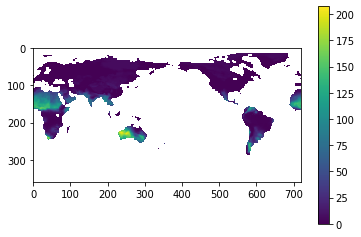

In [34]:
plt.imshow(bui[0,:])
plt.colorbar()

---
---

In [72]:
## sum burned area over weeks to get yearly data
## for the time series analysis
for i in iso:
    yearly = burned_area[burned_area.iso==i].groupby('alert__year').sum()
    yearly.drop(columns=['alert__week'], inplace=True)

In [73]:
yearly

,burned_area__ha
alert__year,
2012,233.942131
2013,13.040924
2014,683.601858
2015,1577.551126
2016,91.093031
2017,903.865255
2018,244.856906
2019,1333.635982
2020,217.919759


In [74]:
# WB climate data does not work with the wbgapi
# climate data api needs to be retrived via requests directly
import requests as r
import platform    # For getting the operating system name
import subprocess  # For executing a shell command
import json

In [75]:
def ping(host):
    """
    Returns True if host (str) responds to a ping request.
    Remember that a host may not respond to a ping (ICMP) request even if the host name is valid.
    """

    # Option for the number of packets as a function of
    param = '-n' if platform.system().lower()=='windows' else '-c'

    # Building the command. Ex: "ping -c 1 google.com"
    command = ['ping', param, '1', host]

    return subprocess.call(command) == 0

In [76]:
url = 'http://climatedataapi.worldbank.org/climateweb/rest/v1/country/cru/tas/year/afg.json'
resp = r.get(url)#, stream=True)

In [77]:
resp.status_code

200

In [78]:
resp.headers["Content-Type"]

'application/json'

In [79]:
#resp.__dict__

In [82]:
resp.json()

[{'year': 1901, 'data': 13.096678},
 {'year': 1902, 'data': 13.309858},
 {'year': 1903, 'data': 12.064352},
 {'year': 1904, 'data': 12.619226},
 {'year': 1905, 'data': 12.437119},
 {'year': 1906, 'data': 12.978949},
 {'year': 1907, 'data': 12.276689},
 {'year': 1908, 'data': 12.527205},
 {'year': 1909, 'data': 12.797849},
 {'year': 1910, 'data': 12.057898},
 {'year': 1911, 'data': 12.295179},
 {'year': 1912, 'data': 12.9023695},
 {'year': 1913, 'data': 12.642592},
 {'year': 1914, 'data': 13.308415},
 {'year': 1915, 'data': 13.922549},
 {'year': 1916, 'data': 12.5204525},
 {'year': 1917, 'data': 13.175219},
 {'year': 1918, 'data': 11.86811},
 {'year': 1919, 'data': 12.038753},
 {'year': 1920, 'data': 11.508769},
 {'year': 1921, 'data': 12.502941},
 {'year': 1922, 'data': 12.974073},
 {'year': 1923, 'data': 11.935648},
 {'year': 1924, 'data': 12.171977},
 {'year': 1925, 'data': 12.666531},
 {'year': 1926, 'data': 12.733714},
 {'year': 1927, 'data': 12.74055},
 {'year': 1928, 'data': 12.4